# **Proyecto 2** | Naive Bayes

## Link del Repositorio

* https://github.com/paulabaal12/PROY2-DM

## Integrantes del equipo
- [Mónica Salvatierra - 22249](https://github.com/alee2602)
- [Paula Barillas - 22764](https://github.com/paulabaal12)
- [Derek Arreaga - 22537](https://github.com/FabianKel) 
- [Juan Pablo Solís - 22102](https://github.com/JPS4321)

### **Importar las librerías a utilizar**

In [18]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score
import time
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

### **Importar los datos de la entrega anterior**

In [19]:
with open("data.pkl", "rb") as f:
    X_train, X_test, y_train, y_test = pickle.load(f)

print(X_train.head(), X_test.head(), y_train.head(), y_test.head())
print(f"Tamaño del conjunto de entrenamiento: {X_train.shape[0]} filas, {X_train.shape[1]} columnas")
print(f"Tamaño del conjunto de prueba: {X_test.shape[0]} filas, {X_test.shape[1]} columnas")


        Id  MSSubClass  LotFrontage  LotArea  Neighborhood  Condition1  \
87      88         160         40.0     3951      0.058904    0.863014   
1457  1458          70         66.0     9042      0.034932    0.863014   
1000  1001          20         74.0    10206      0.068493    0.863014   
1441  1442         120         69.0     4426      0.102740    0.863014   
927    928          60         69.0     9900      0.050000    0.055479   

      Condition2  OverallQual  OverallCond  YearBuilt  ...  BsmtFinType2_None  \
87      0.989726            6            5       2009  ...              False   
1457    0.989726            7            9       1941  ...              False   
1000    0.989726            3            3       1952  ...               True   
1441    0.989726            6            5       2004  ...              False   
927     0.989726            7            5       1968  ...              False   

      BsmtFinType2_Rec  BsmtFinType2_Unf  GarageType_Attchd  \
87   

In [20]:
if "PriceCategory" not in X_train.columns:
    low_threshold = y_train.quantile(0.33)
    high_threshold = y_train.quantile(0.66)

    def categorize_price(price):
        if price <= low_threshold:
            return "Económica"
        elif price <= high_threshold:
            return "Intermedia"
        else:
            return "Cara"

    y_train_class = y_train.apply(categorize_price).reset_index(drop=True)
    y_test_class = y_test.apply(categorize_price).reset_index(drop=True)
    X_train = X_train.reset_index(drop=True)
    X_test = X_test.reset_index(drop=True)

    X_train["PriceCategory"] = y_train_class
    X_test["PriceCategory"] = y_test_class

Tipo de y_train: <class 'pandas.core.series.Series'>
Nombre de y_train: SalePrice
Nombre de y_test: SalePrice
 Evaluación del Modelo Naïve Bayes:
 MAE (Error Absoluto Medio): 28607.51
 MSE (Error Cuadrático Medio): 2874479167.39
 RMSE (Raíz del Error Cuadrático Medio): 53614.17
 R² (Coeficiente de determinación): 0.5965


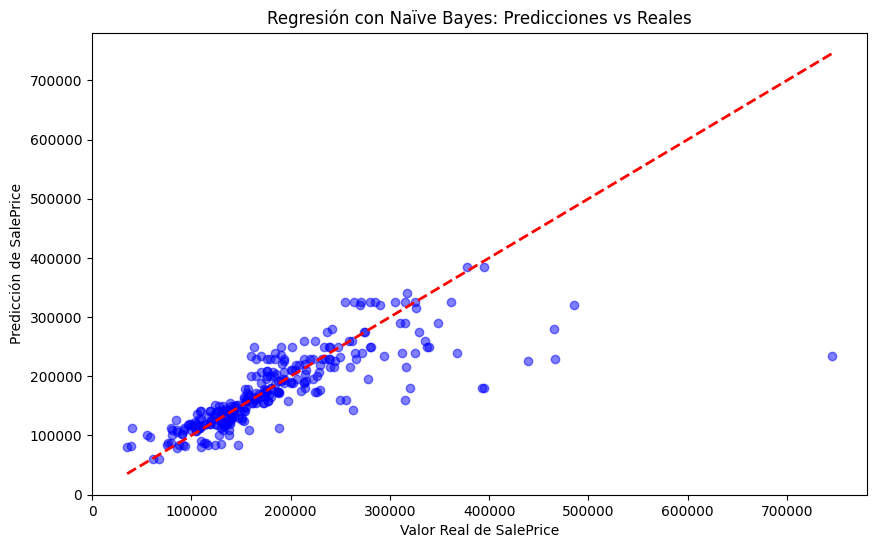

In [21]:

print(f"Tipo de y_train: {type(y_train)}")  


y_train_reg = y_train  
y_test_reg = y_test  


print(f"Nombre de y_train: {y_train.name}")  
print(f"Nombre de y_test: {y_test.name}")  


X_train_reg = X_train.drop(columns=["Id", "PriceCategory"], errors="ignore")
X_test_reg = X_test.drop(columns=["Id", "PriceCategory"], errors="ignore")


gnb = GaussianNB()
gnb.fit(X_train_reg, y_train_reg)


y_pred_reg = gnb.predict(X_test_reg)


mae = mean_absolute_error(y_test_reg, y_pred_reg)
mse = mean_squared_error(y_test_reg, y_pred_reg)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_reg, y_pred_reg)


print(f" Evaluación del Modelo Naïve Bayes:")
print(f" MAE (Error Absoluto Medio): {mae:.2f}")
print(f" MSE (Error Cuadrático Medio): {mse:.2f}")
print(f" RMSE (Raíz del Error Cuadrático Medio): {rmse:.2f}")
print(f" R² (Coeficiente de determinación): {r2:.4f}")


plt.figure(figsize=(10, 6))
plt.scatter(y_test_reg, y_pred_reg, alpha=0.5, color="blue")
plt.plot([y_test_reg.min(), y_test_reg.max()], [y_test_reg.min(), y_test_reg.max()], "--r", linewidth=2)
plt.xlabel("Valor Real de SalePrice")
plt.ylabel("Predicción de SalePrice")
plt.title("Regresión con Naïve Bayes: Predicciones vs Reales")
plt.show()


#### **Analice los resultados del modelo de regresión usando Bayes Ingenuo. ¿Qué tan bien hizo las predicciones? Utilice las métricas correctas.**
El modelo de regresión con Bayes Ingenuo mostró un rendimiento moderado, explicando el 59.65% de la variabilidad en los precios de las casas (R² = 0.5965). Sin embargo, el error absoluto medio (MAE = 28,607.51) y la raíz del error cuadrático medio (RMSE = 53,614.17) indican que las predicciones tienen una desviación considerable. Aunque el modelo funciona relativamente bien en valores bajos y medios, tiende a subestimar los precios más altos, lo que sugiere que la suposición de distribución normal en las variables no se cumple completamente. En general, Naïve Bayes no es la mejor opción para regresión, esto debido a sus fuertes suposiciones y la incapacidad de modelar adecuadamente la variabilidad en los datos al ser un modelo diseñado para clasificacion. 

#### **Comparación con otros modelos de regresión**

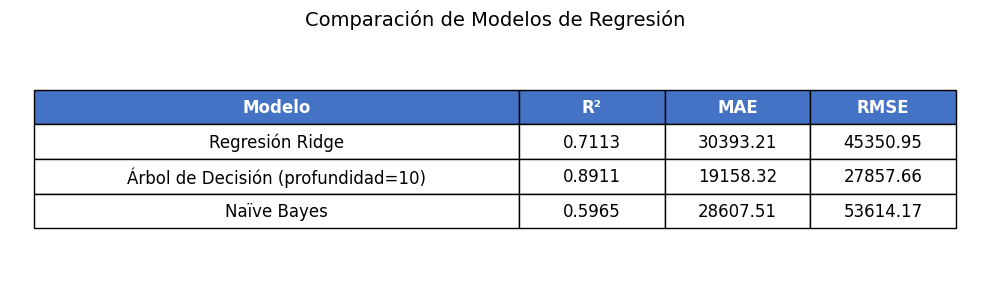

In [22]:

data = {
    "Modelo": [
        "Regresión Ridge",
        "Árbol de Decisión (profundidad=10)",
        "Naïve Bayes"
    ],
    "R²": [0.7113, 0.8911, 0.5965],
    "MAE": [30393.21, 19158.32, 28607.51],
    "RMSE": [45350.95, 27857.66, 53614.17]
}

df_resultados = pd.DataFrame(data)

# Crear una tabla de comparación de métricas
fig, ax = plt.subplots(figsize=(10, 3))
ax.axis('off')

tabla = ax.table(
    cellText=df_resultados.values,
    colLabels=df_resultados.columns,
    cellLoc='center',
    loc='center',
    colWidths=[0.5, 0.15, 0.15, 0.15] 
)

# Estilizar la tabla
tabla.auto_set_font_size(False)
tabla.set_fontsize(12)
tabla.scale(1, 2)

# Estilizar encabezados
for j in range(len(df_resultados.columns)):
    tabla[(0, j)].set_facecolor('#4472C4')
    tabla[(0, j)].set_text_props(color='white', fontweight='bold')

plt.title("Comparación de Modelos de Regresión", fontsize=14, pad=10)
plt.tight_layout()
plt.show()


Al comparar el desempeño de los tres modelos de regresión evaluados (Regresión Ridge, Árbol de Decisión y Naïve Bayes) se observa que el Árbol de Decisión con profundidad 10 es el que presenta el mejor rendimiento general. Este modelo obtuvo un coeficiente de determinación R² de **0.8911**, lo que indica que es capaz de explicar aproximadamente el **89.11%** de la variabilidad en los precios de las casas. Además, presenta los menores errores de predicción, tanto en MAE (19,158.32) como en RMSE (27,857.66), lo cual refleja una mayor precisión y menor dispersión entre los valores reales y los predichos.

En segundo lugar, se encuentra la Regresión Ridge, que logra un R² de **0.7113**, bastante aceptable, pero con errores más elevados (MAE de 30,393.21 y RMSE de 45,350.95) en comparación con el árbol. Aunque Ridge mejora el rendimiento respecto a una regresión lineal tradicional al regularizar los coeficientes, no logra capturar completamente la complejidad del problema.

Por último, el modelo de Naïve Bayes mostró el desempeño más limitado, con un R² de **0.5965** y el mayor RMSE (53,614.17), lo cual evidencia una menor capacidad de generalización y una tendencia a subestimar los valores altos. Esto era de esperarse, ya que Naïve Bayes está diseñado originalmente para tareas de clasificación, y sus supuestos de independencia fuerte entre variables no se ajustan del todo al problema de regresión.

En conclusión, el **Árbol de Decisión** fue el modelo más efectivo para predecir el precio de las casas, mostrando tanto una mayor capacidad explicativa como una menor magnitud de error en sus predicciones.

#### **Entrenar el modelo implementando la validación cruzada**

In [23]:
from sklearn.model_selection import cross_val_score


print("\nValidación cruzada para el modelo de regresión:")
cv_scores = cross_val_score(gnb, X_train_reg, y_train_reg, cv=5, scoring='r2')
print(f"Puntuaciones R² de validación cruzada: {cv_scores}")
print(f"Media de R² en validación cruzada: {cv_scores.mean():.4f}")
print(f"Desviación estándar de R² en validación cruzada: {cv_scores.std():.4f}")


Validación cruzada para el modelo de regresión:


C:\Users\rebe1\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Puntuaciones R² de validación cruzada: [0.56616179 0.59864097 0.64405593 0.65019395 0.56710895]
Media de R² en validación cruzada: 0.6052
Desviación estándar de R² en validación cruzada: 0.0362


#### **MODELO DE CLASIFICACIÓN CON NAIVE BAYES**

In [24]:
# Preparar datos para clasificación

X_train_class = X_train.drop(columns=["Id", "PriceCategory"], errors="ignore")
X_test_class = X_test.drop(columns=["Id", "PriceCategory"], errors="ignore")
y_train_class = X_train["PriceCategory"] if "PriceCategory" in X_train.columns else y_train_class
y_test_class = X_test["PriceCategory"] if "PriceCategory" in X_test.columns else y_test_class

# Verificar distribución de clases
print("Distribución de clases en conjunto de entrenamiento:")
print(y_train_class.value_counts())
print("\nDistribución de clases en conjunto de prueba:")
print(y_test_class.value_counts())

# Entrenar modelo de clasificación
start_time = time.time()
gnb_class = GaussianNB()
gnb_class.fit(X_train_class, y_train_class)
train_time_class = time.time() - start_time
print(f"Tiempo de entrenamiento (clasificación): {train_time_class:.2f} segundos")

# Predicciones
start_time = time.time()
y_pred_class = gnb_class.predict(X_test_class)
predict_time_class = time.time() - start_time
print(f"Tiempo de predicción (clasificación): {predict_time_class:.2f} segundos")

# Evaluación del modelo de clasificación
accuracy = accuracy_score(y_test_class, y_pred_class)
conf_matrix = confusion_matrix(y_test_class, y_pred_class)
class_report = classification_report(y_test_class, y_pred_class)

print(f"\nPrecisión del modelo: {accuracy:.4f}")
print("\nMatriz de confusión:")
print(conf_matrix)
print("\nInforme de clasificación:")
print(class_report)

Distribución de clases en conjunto de entrenamiento:
PriceCategory
Cara          392
Intermedia    390
Económica     386
Name: count, dtype: int64

Distribución de clases en conjunto de prueba:
PriceCategory
Cara          105
Económica      99
Intermedia     88
Name: count, dtype: int64
Tiempo de entrenamiento (clasificación): 0.01 segundos
Tiempo de predicción (clasificación): 0.00 segundos

Precisión del modelo: 0.8116

Matriz de confusión:
[[92  0 13]
 [ 0 94  5]
 [22 15 51]]

Informe de clasificación:
              precision    recall  f1-score   support

        Cara       0.81      0.88      0.84       105
   Económica       0.86      0.95      0.90        99
  Intermedia       0.74      0.58      0.65        88

    accuracy                           0.81       292
   macro avg       0.80      0.80      0.80       292
weighted avg       0.81      0.81      0.80       292



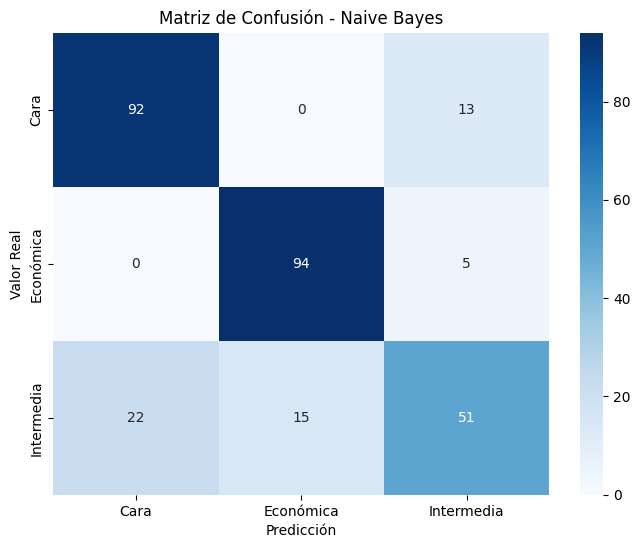


Análisis de errores:
Total de predicciones: 292
Predicciones correctas: 237
Predicciones incorrectas: 55


In [ ]:
# Visualización de la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
           xticklabels=gnb_class.classes_, 
           yticklabels=gnb_class.classes_)
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión - Naive Bayes')
plt.show()

error_analysis = pd.DataFrame({
    'Real': y_test_class,
    'Predicción': y_pred_class
})
error_analysis['Correcto'] = error_analysis['Real'] == error_analysis['Predicción']
print("\nAnálisis de errores:")
print(f"Total de predicciones: {len(error_analysis)}")
print(f"Predicciones correctas: {error_analysis['Correcto'].sum()}")
print(f"Predicciones incorrectas: {len(error_analysis) - error_analysis['Correcto'].sum()}")

In [27]:
print("\nValidación cruzada para el modelo de clasificación:")
cv_scores_class = cross_val_score(gnb_class, X_train_class, y_train_class, cv=5, scoring='accuracy')
print(f"Puntuaciones de precisión en validación cruzada: {cv_scores_class}")
print(f"Media de precisión en validación cruzada: {cv_scores_class.mean():.4f}")
print(f"Desviación estándar de precisión en validación cruzada: {cv_scores_class.std():.4f}")



Validación cruzada para el modelo de clasificación:
Puntuaciones de precisión en validación cruzada: [0.76495726 0.76923077 0.81196581 0.75965665 0.78969957]
Media de precisión en validación cruzada: 0.7791
Desviación estándar de precisión en validación cruzada: 0.0193
